In [1]:
import os
# Toggling between CPU and GPU
# GPU in use is NVIDIA GEFORCE 940M
# Theano backend is being used for keras
# To make the GPU unavailable, uncomment the line of code below
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
from tensorflow.keras.callbacks import TensorBoard
file_name = 'my_save_model'
tensorboard = TensorBoard(log_dir="logs\\{}".format(file_name))

In [3]:
import tensorflow as tf
import time
import datetime, os
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils import to_categorical

import sys,humanize,psutil,GPUtil

Using TensorFlow backend.


# Fashion MNIST Dataset
## **Overview**
Fashion MNIST is a dataset that resembles MNIST but instead of handwritten digits, it uses images of clothing. There are 10 classes and each image is 28x28 grayscale. A total of 70000 images; 60000 for training and 10,000 for testing make up the dataset.

### Labels
Every training and test case is given one of the labels listed below:

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle Boot


In [5]:
# Loading Dataset (CIFAR-10 dataset)
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


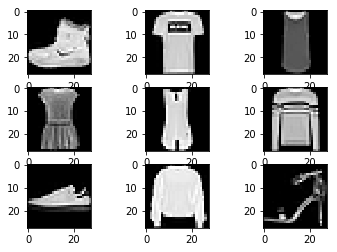

In [6]:
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [7]:
# Reshape images for mnist (28 x 28, 1)
train_images = train_images.reshape(60000, 28, 28, 1)
test_images=test_images.reshape(10000, 28, 28, 1)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
# Model Buiding
LeNet = models.Sequential()

# Convolution 1: Filters as we know is 6. Filter size is 5x5, relu is the activation function
LeNet.add(layers.Conv2D(36, (5,5), activation = 'relu', input_shape=(28,28,1)))
# Subsampling 1: Input  = 32x32x6. Output = 14x14x6. SubSampling is simply MaxPooling so we use MaxPool (image reduction factor of 2)
LeNet.add(layers.MaxPooling2D((2,2)))

# Convolution 2: Input = 14x14x6. Output = 10x10x16 Conv2d
LeNet.add(layers.Conv2D(16, (5,5), activation='relu'))
# Subsampling 2: Input 32x32x6. Output = 14x14x6. SubSampling is simply MaxPooling so we use MaxPool (image reduction factor of 2)
LeNet.add(layers.MaxPooling2D((2,2)))

# Flatten for further steps to happen
# It is the process of converting all the resultant 2D arrays as single long continous linear vector
LeNet.add(layers.Flatten())

# Fully connected 1: Input = 5x5x16. Output = 120
LeNet.add(layers.Dense(120, activation='relu'))

# Fully connected 2: Input =120. Output = 84
LeNet.add(layers.Dense(84, activation='relu'))

# Final, Output and activation through softmax
LeNet.add(layers.Dense(10, activation='softmax'))
LeNet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 36)        936       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          14416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164     
__________

In [9]:
# Compile
LeNet.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Define function (For CPU) Memory Report
# Run this cell only when executing on CPU to get CPU memory and utilization
def cpu_mem_report():
  print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))

  # Getting usage of cpu virtual_memory in GB
  print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)
  # Getting % usage of cpu virtual_memory
  print('CPU RAM % used: ', psutil.virtual_memory()[2])

In [ ]:
# Define function (For GPU) Memory Report
# Run this cell only when executing on GPU to get GPU memory and utilization
def gpu_mem_report():
  print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))

  GPUs = GPUtil.getGPUs()
  for i, gpu in enumerate(GPUs):
    print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))

In [11]:
# Train model
t1 = time.time()

# Training for 10 epochs and a batch size of 10
history = LeNet.fit( train_images, train_labels, verbose=1, epochs = 10, batch_size = 10, validation_split = 0.2, callbacks=[tensorboard])
#model.fit(train_images[:20000], train_labels[:20000], epochs = , batch_size = 10)
t2 = time.time() 
print("Training Time: ", t2-t1)
cpu_mem_report()
#gpu_mem_report()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 87s 2ms/step - loss: 0.4982 - acc: 0.8164 - val_loss: 0.3617 - val_acc: 0.8704
Epoch 2/10
48000/48000 [==============================] - 88s 2ms/step - loss: 0.3362 - acc: 0.8766 - val_loss: 0.3126 - val_acc: 0.8840
Epoch 3/10
48000/48000 [==============================] - 88s 2ms/step - loss: 0.2967 - acc: 0.8897 - val_loss: 0.2998 - val_acc: 0.8910
Epoch 4/10
48000/48000 [==============================] - 88s 2ms/step - loss: 0.2658 - acc: 0.9009 - val_loss: 0.2834 - val_acc: 0.8951
Epoch 5/10
48000/48000 [==============================] - 88s 2ms/step - loss: 0.2442 - acc: 0.9079 - val_loss: 0.2724 - val_acc: 0.9016
Epoch 6/10
48000/48000 [==============================] - 90s 2ms/step - loss: 0.2272 - acc: 0.9141 - val_loss: 0.2814 - val_acc: 0.8980
Epoch 7/10
48000/48000 [==============================] - 92s 2ms/step - loss: 0.2158 - acc: 0.9190 - val_loss: 0.2710 - val_acc

In [12]:
# Evaluating the framework on the Test dataset
t1 = time.time()

_, acc = LeNet.evaluate(test_images, test_labels)
print("Accuracy = ", (acc*100.0), "%")

t2 = time.time() 
print("Testing Time: ", t2-t1)

10000/10000 [==============================] - 5s 506us/step
Accuracy =  90.16 %
Testing Time:  5.063304901123047


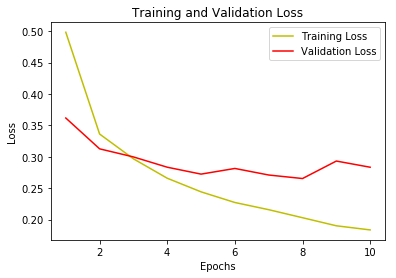

In [13]:
# Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss,'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

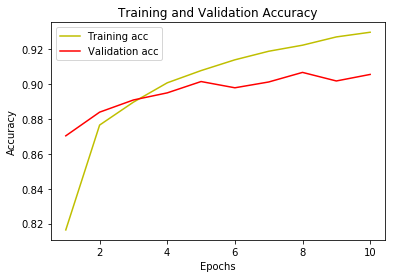

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc,'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()